In [79]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

In [80]:
from google.colab import files

Cargar archivos desde tu sistema local

In [81]:
uploaded = files.upload()

Saving E1.jpeg to E1 (4).jpeg
Saving E2.jpeg to E2 (4).jpeg
Saving E3.jpeg to E3 (4).jpeg
Saving E4.jpeg to E4 (4).jpeg


In [82]:
import os

In [83]:
import matplotlib.pyplot as plt

Directorio de destino para almacenar las imágenes cargadas

In [84]:
target_dir = 'dataset'

Crear el directorio de destino si no existe

In [85]:
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

Guardar las imágenes en el directorio de destino

In [86]:
for filename, image_data in uploaded.items():
    with open(os.path.join(target_dir, filename), 'wb') as file:
        file.write(image_data)

Obtener la lista de rutas de las imágenes cargadas

In [87]:
image_paths = [os.path.join(target_dir, filename) for filename in uploaded.keys()]

Lista de etiquetas correspondientes a las imágenes

In [88]:
labels = ['Eduardo'] * len(image_paths)

Lista para almacenar las imágenes y etiquetas

In [89]:
train_images = []
train_labels = []

Cargar las imágenes y etiquetas

In [90]:
for image_path, label in zip(image_paths, labels):
    image = Image.open(image_path)
    image = image.resize((64, 64))
    image = np.array(image) / 255.0
    train_images.append(image)
    train_labels.append(label)

Convierte las listas a matrices numpy

In [91]:
train_images = np.array(train_images)

Convertir las etiquetas a valores numéricos

In [92]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)

Definir el modelo

In [93]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compilar el modelo

In [94]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Entrenar el modelo

In [95]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.8232 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 59ms/step - loss: 0.5675 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 52ms/step - loss: 0.3779 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 57ms/step - loss: 0.1659 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 71ms/step - loss: 0.0306 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 53ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 54ms/step - loss: 5.2243e-05 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 64ms/step - loss: 6.1848e-07 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 52ms/step - loss: 3.7159e-09 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 44ms/step - loss: 1.2511e-11 - accuracy: 1.0000


Guardar el modelo entrenado

In [96]:
model.save('modelo_reconocimiento_facial.h5')

Mostrar resultados de clasificación

In [97]:
test_images = train_images  

Realizar la predicción en las imágenes de prueba

In [98]:
predictions = model.predict(test_images)

1/1 [==============================] - 0s 123ms/step


Decodificar las predicciones a etiquetas

In [99]:
predicted_labels = label_encoder.inverse_transform(predictions.reshape(-1).round().astype(int))

Mostrar los resultados

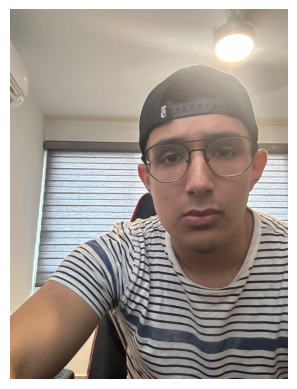

Etiqueta predicha: Eduardo
-------------------------


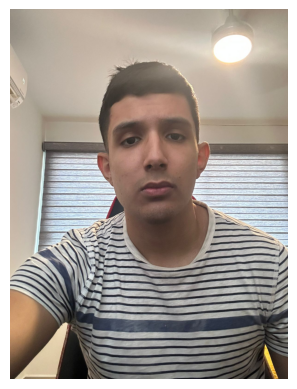

Etiqueta predicha: Eduardo
-------------------------


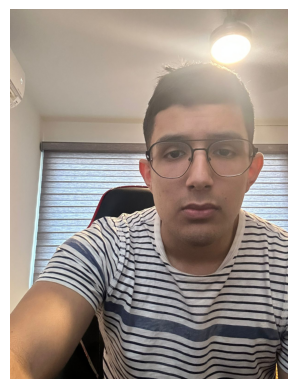

Etiqueta predicha: Eduardo
-------------------------


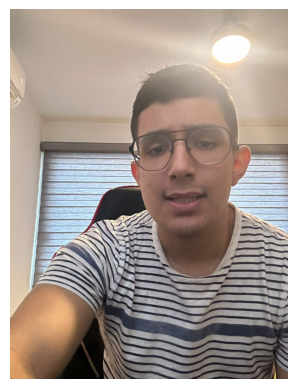

Etiqueta predicha: Eduardo
-------------------------


In [111]:
for image_path, predicted_label in zip(image_paths, predicted_labels):
    # Cargar y mostrar la imagen
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    # Mostrar la etiqueta predicha
    print(f"Etiqueta predicha: {predicted_label}")
    print("-------------------------")